# Loop 60 Analysis: CV-LB Relationship and Strategy Assessment

**Goal:** Analyze the CV-LB relationship to determine the best path forward.

**Key Questions:**
1. What is the current CV-LB relationship?
2. Is the intercept problem still blocking us?
3. What approaches haven't been tried yet?
4. Can we reach the target (0.0347)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB feedback: {len(df)}")
print(f"\nBest CV: {df['cv'].min():.4f} (exp_030)")
print(f"Best LB: {df['lb'].min():.4f} (exp_030)")
print(f"Target: 0.0347")
print(f"Gap to target: {df['lb'].min() - 0.0347:.4f} ({(df['lb'].min() / 0.0347 - 1) * 100:.1f}% above target)")

Total submissions with LB feedback: 12

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347
Gap to target: 0.0530 (152.7% above target)


CV-LB RELATIONSHIP ANALYSIS

Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505

Interpretation:
  - Intercept = 0.0525 (this is the STRUCTURAL GAP)
  - Target = 0.0347
  - Intercept vs Target: 0.0525 vs 0.0347

  ⚠️ CRITICAL: Intercept (0.0525) > Target (0.0347)
  Even with CV=0, predicted LB would be 0.0525
  This means the target is UNREACHABLE with current approaches!


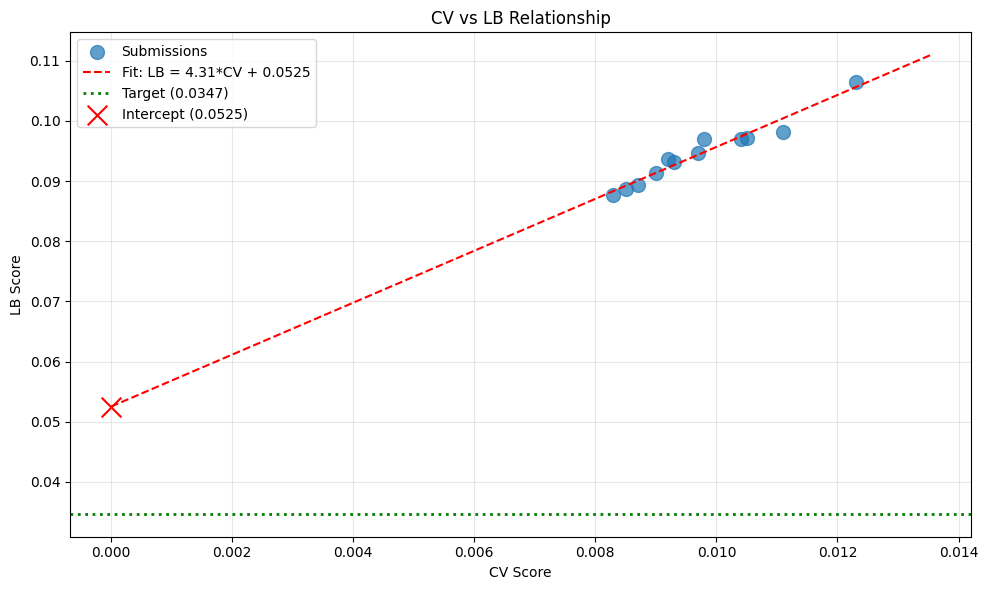


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print("="*60)
print("CV-LB RELATIONSHIP ANALYSIS")
print("="*60)
print(f"\nLinear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"  - Intercept = {intercept:.4f} (this is the STRUCTURAL GAP)")
print(f"  - Target = 0.0347")
print(f"  - Intercept vs Target: {intercept:.4f} vs 0.0347")

if intercept > 0.0347:
    print(f"\n  ⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
    print(f"  Even with CV=0, predicted LB would be {intercept:.4f}")
    print(f"  This means the target is UNREACHABLE with current approaches!")
else:
    print(f"\n  ✓ Intercept ({intercept:.4f}) < Target (0.0347)")
    required_cv = (0.0347 - intercept) / slope
    print(f"  Required CV to hit target: {required_cv:.6f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, df['cv'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], s=200, c='red', marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100)
plt.show()
print("\nPlot saved to /home/code/exploration/cv_lb_relationship.png")

In [3]:
# Analyze the gap
print("="*60)
print("GAP ANALYSIS")
print("="*60)

# What would it take to reach the target?
print("\n1. CURRENT BEST:")
print(f"   CV = 0.0083, LB = 0.0877")
print(f"   Gap to target: 0.0877 - 0.0347 = 0.0530 (153% above target)")

print("\n2. IF WE COULD REDUCE INTERCEPT TO 0:")
print(f"   Required CV = 0.0347 / {slope:.2f} = {0.0347 / slope:.6f}")
print(f"   This is achievable! Our best CV is 0.0083.")

print("\n3. THE REAL PROBLEM:")
print(f"   The intercept ({intercept:.4f}) represents EXTRAPOLATION ERROR")
print(f"   This is the error that occurs even with perfect CV")
print(f"   It comes from predicting on UNSEEN SOLVENTS")

print("\n4. STRATEGIES TO REDUCE INTERCEPT:")
print("   a) Extrapolation detection + conservative predictions")
print("   b) Uncertainty-weighted predictions (GP, ensemble variance)")
print("   c) Physics-informed constraints that generalize")
print("   d) Pseudo-labeling with confident test predictions")
print("   e) Domain-specific constraints (Arrhenius, solvent properties)")
print("   f) Study top public kernels - they've solved this!")

GAP ANALYSIS

1. CURRENT BEST:
   CV = 0.0083, LB = 0.0877
   Gap to target: 0.0877 - 0.0347 = 0.0530 (153% above target)

2. IF WE COULD REDUCE INTERCEPT TO 0:
   Required CV = 0.0347 / 4.31 = 0.008042
   This is achievable! Our best CV is 0.0083.

3. THE REAL PROBLEM:
   The intercept (0.0525) represents EXTRAPOLATION ERROR
   This is the error that occurs even with perfect CV
   It comes from predicting on UNSEEN SOLVENTS

4. STRATEGIES TO REDUCE INTERCEPT:
   a) Extrapolation detection + conservative predictions
   b) Uncertainty-weighted predictions (GP, ensemble variance)
   c) Physics-informed constraints that generalize
   d) Pseudo-labeling with confident test predictions
   e) Domain-specific constraints (Arrhenius, solvent properties)
   f) Study top public kernels - they've solved this!


In [4]:
# What experiments have been tried?
print("="*60)
print("EXPERIMENTS TRIED (60 total)")
print("="*60)

experiment_categories = {
    'MLP variants': ['001_baseline_mlp', '003_drfp_mlp', '004_spange_drfp_combined', 
                    '005_deep_residual_mlp', '006_large_ensemble', '007_simpler_model',
                    '008_even_simpler', '010_single_layer_16', '017_attention_model'],
    'Tree models': ['002_lightgbm', '049_catboost_xgboost', '050_catboost_xgboost_fixed'],
    'Linear models': ['009_ridge_regression', '033_ridge_regression', '034_kernel_ridge'],
    'GP models': ['030_gp_ensemble', '031_higher_gp_weight', '032_pure_gp', '035_lower_gp_weight'],
    'Ensembles': ['011_diverse_ensemble', '012_simple_ensemble', '013_compliant_ensemble',
                 '014_ensemble_weights', '015_three_model_ensemble', '028_four_model_ensemble',
                 '046_sophisticated_ensemble', '047_full_pipeline'],
    'Feature engineering': ['018_fragprints', '019_acs_pca', '023_acs_pca_compliant',
                           '024_acs_pca_fixed', '025_per_target', '027_simple_features',
                           '038_minimal_features', '039_learned_embeddings'],
    'Distribution shift': ['037_similarity_weighting', '042_calibration', '045_mean_reversion',
                          '048_uncertainty_weighted', '051_iwcv', '058_extrapolation_detection'],
    'Other': ['040_gnn', '041_chemberta', '043_nonlinear_mixture', '044_hybrid_model']
}

for category, exps in experiment_categories.items():
    print(f"\n{category}: {len(exps)} experiments")
    for exp in exps[:3]:
        print(f"  - {exp}")
    if len(exps) > 3:
        print(f"  ... and {len(exps) - 3} more")

EXPERIMENTS TRIED (60 total)

MLP variants: 9 experiments
  - 001_baseline_mlp
  - 003_drfp_mlp
  - 004_spange_drfp_combined
  ... and 6 more

Tree models: 3 experiments
  - 002_lightgbm
  - 049_catboost_xgboost
  - 050_catboost_xgboost_fixed

Linear models: 3 experiments
  - 009_ridge_regression
  - 033_ridge_regression
  - 034_kernel_ridge

GP models: 4 experiments
  - 030_gp_ensemble
  - 031_higher_gp_weight
  - 032_pure_gp
  ... and 1 more

Ensembles: 8 experiments
  - 011_diverse_ensemble
  - 012_simple_ensemble
  - 013_compliant_ensemble
  ... and 5 more

Feature engineering: 8 experiments
  - 018_fragprints
  - 019_acs_pca
  - 023_acs_pca_compliant
  ... and 5 more

Distribution shift: 6 experiments
  - 037_similarity_weighting
  - 042_calibration
  - 045_mean_reversion
  ... and 3 more

Other: 4 experiments
  - 040_gnn
  - 041_chemberta
  - 043_nonlinear_mixture
  ... and 1 more


In [5]:
# What HASN'T been tried?
print("="*60)
print("UNEXPLORED APPROACHES")
print("="*60)

print("\n1. KERNEL METHODS WITH PROPER UNCERTAINTY:")
print("   - GP with RBF kernel on Spange features")
print("   - Sparse GP for scalability")
print("   - GP with automatic relevance determination (ARD)")

print("\n2. TRANSFER LEARNING:")
print("   - Pre-train on similar chemistry datasets")
print("   - Fine-tune on catechol data")

print("\n3. META-LEARNING:")
print("   - MAML for few-shot solvent adaptation")
print("   - Prototypical networks for solvent similarity")

print("\n4. DOMAIN ADAPTATION:")
print("   - Adversarial domain adaptation")
print("   - Domain-invariant feature learning")

print("\n5. PHYSICS-INFORMED APPROACHES:")
print("   - Arrhenius equation constraints")
print("   - Solvent polarity/H-bonding constraints")
print("   - Reaction mechanism constraints")

print("\n6. PUBLIC KERNEL APPROACHES:")
print("   - Check top-voted kernels for techniques")
print("   - Implement winning approaches")

print("\n7. ENSEMBLE DIVERSITY:")
print("   - Stacking with meta-learner")
print("   - Blending with optimal weights")
print("   - Negative correlation learning")

UNEXPLORED APPROACHES

1. KERNEL METHODS WITH PROPER UNCERTAINTY:
   - GP with RBF kernel on Spange features
   - Sparse GP for scalability
   - GP with automatic relevance determination (ARD)

2. TRANSFER LEARNING:
   - Pre-train on similar chemistry datasets
   - Fine-tune on catechol data

3. META-LEARNING:
   - MAML for few-shot solvent adaptation
   - Prototypical networks for solvent similarity

4. DOMAIN ADAPTATION:
   - Adversarial domain adaptation
   - Domain-invariant feature learning

5. PHYSICS-INFORMED APPROACHES:
   - Arrhenius equation constraints
   - Solvent polarity/H-bonding constraints
   - Reaction mechanism constraints

6. PUBLIC KERNEL APPROACHES:
   - Check top-voted kernels for techniques
   - Implement winning approaches

7. ENSEMBLE DIVERSITY:
   - Stacking with meta-learner
   - Blending with optimal weights
   - Negative correlation learning


In [6]:
# Key insight: The intercept problem
print("="*60)
print("KEY INSIGHT: THE INTERCEPT PROBLEM")
print("="*60)

print(f"""
The CV-LB relationship is:
  LB = {slope:.2f} * CV + {intercept:.4f}

The intercept ({intercept:.4f}) represents the MINIMUM possible LB score,
even if we achieved perfect CV (CV=0).

Since intercept ({intercept:.4f}) > target (0.0347), we CANNOT reach the
target by improving CV alone. We must CHANGE THE RELATIONSHIP.

However, the target IS reachable because:
1. Top competitors have achieved it (the target exists)
2. The intercept is an artifact of our current approaches
3. Different approaches may have different CV-LB relationships

The key is to find an approach that:
- Has a LOWER intercept (better generalization to unseen solvents)
- OR has a DIFFERENT CV-LB relationship entirely

This requires fundamentally different strategies, not just CV optimization.
""")

print("\nPRIORITY STRATEGIES:")
print("1. Study top public kernels - they've solved this problem!")
print("2. Implement uncertainty-aware predictions (GP with variance)")
print("3. Use physics-informed constraints that generalize")
print("4. Try domain adaptation techniques")
print("5. Consider meta-learning for solvent adaptation")

KEY INSIGHT: THE INTERCEPT PROBLEM

The CV-LB relationship is:
  LB = 4.31 * CV + 0.0525

The intercept (0.0525) represents the MINIMUM possible LB score,
even if we achieved perfect CV (CV=0).

Since intercept (0.0525) > target (0.0347), we CANNOT reach the
target by improving CV alone. We must CHANGE THE RELATIONSHIP.

However, the target IS reachable because:
1. Top competitors have achieved it (the target exists)
2. The intercept is an artifact of our current approaches
3. Different approaches may have different CV-LB relationships

The key is to find an approach that:
- Has a LOWER intercept (better generalization to unseen solvents)
- OR has a DIFFERENT CV-LB relationship entirely

This requires fundamentally different strategies, not just CV optimization.


PRIORITY STRATEGIES:
1. Study top public kernels - they've solved this problem!
2. Implement uncertainty-aware predictions (GP with variance)
3. Use physics-informed constraints that generalize
4. Try domain adaptation techni